<a href="https://colab.research.google.com/github/sbhutta123/CMSC320/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 3

DID: sbhutta

UID: 117275223

Name: Shifa Bhutta

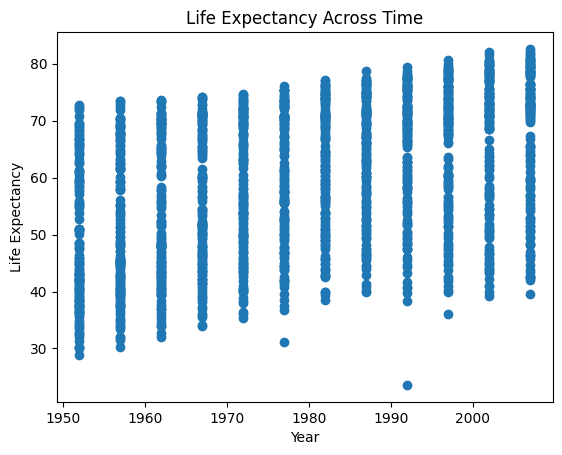

In [17]:
#Exercise 1

import pandas as pd
import matplotlib.pyplot as plt

#reads the data and stores it in a dataframe
country_data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')

#creates a scatter plot of life expectancy vs. year
plt.scatter(country_data['year'], country_data['lifeExp'])

# Set plot title and axis labels
plt.title('Life Expectancy Across Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

#shows the plot
plt.show()



Prose:

I saved the file to my computer and then stored it using the read_csv() command and told it to use tab as the seperator instead of commas because it is a tsv and not a csv file. Then, I used the matplot library to graph a scatterplot that has life expectancy on the y-axis and year on the x-axis.

Question 1:

The general trend is that life expectancy has increased over time and the trend is linear.

Question 2:

From 1952-1957, it is skewed right meaning more people were dying at younger ages. Then, from 1962-1972, it was pretty symmetric. From 1977 onward, it was skewed left.

Question 3:

Yes, we will reject the null hypothesis of no relationship because life expectancy and year are correlated according to the graphs.

Question 4:

I think the residuals would show a linear trend. They would show a pattern. it wiould not just be randomly scattered because I believe there is correlation between year and life expectancy.

Question 5:

The assumptions of a linear regression model is a linear relationship, the variance of the residual is the same for any value of X, observations are independent of each other, and the data is normally distributed. All of these assumptions should be true for the model.



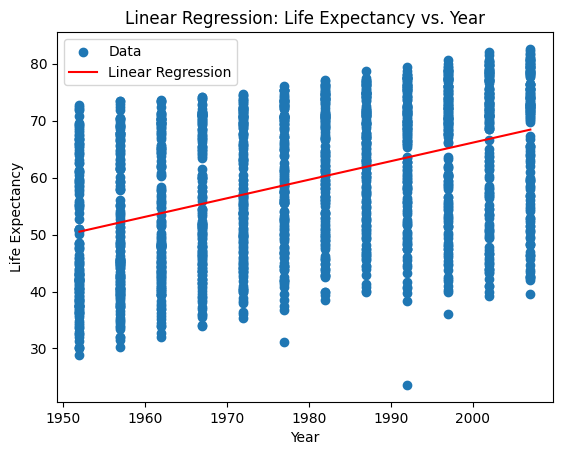

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           7.55e-80
Time:                        17:15:42   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

In [18]:
#Exercise 2

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

#reshape to 2D array
X = country_data['year'].values.reshape(-1, 1)
y = country_data['lifeExp'].values

#create and fits the linear regression model
model = LinearRegression()
model.fit(X, y)

#gets slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

#creates linear regression model predictions
predictions = model.predict(X)

#plots data points and the linear regression line
plt.scatter(country_data['year'], country_data['lifeExp'], label='Data')
plt.plot(country_data['year'], predictions, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: Life Expectancy vs. Year')
plt.legend()
plt.show()

model = smf.ols(formula='lifeExp ~ year', data=country_data).fit()

#gets the summary of the regression model
summary = model.summary()

#prints the summary of the regression model
print(summary)

Prose:

Creates a linear regression model using Scikit-Learn and sees the summary of the data using statsmodel library. The graph has to be reshaped into a 2D array in order to be usable for Scikit-Learn. Then, we proceed to make the model and perform the ols function to get the summary of our model.

Question 6:

According to the model, life expectancy increase by .3259 years on average.  

Question 7:

Yes, we would reject the null hypothesis because the p-val is 0 which is less than .05 which means it it statistically significant, and we do have enough evidence to reject the null.

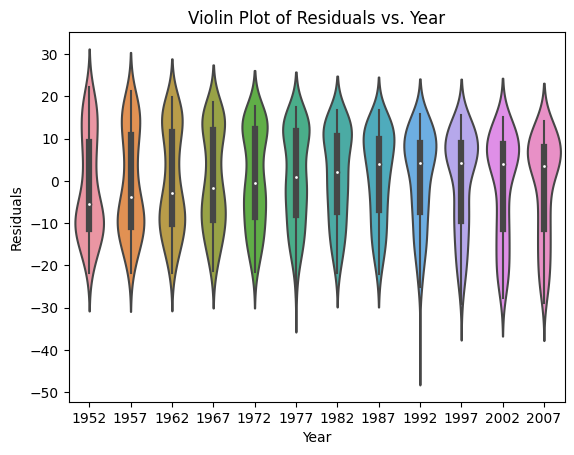

In [19]:
#Exercise 3

import seaborn as sns

residuals = model.resid

#creates a DataFrame for year and residuals
residuals_df = pd.DataFrame({'Year': country_data['year'], 'Residuals': residuals})

#creates the violin plot
sns.violinplot(x='Year', y='Residuals', data=residuals_df)

plt.title('Violin Plot of Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')

#shows the plot
plt.show()



Prose:

A violin plot is created using the seaborn library to see the relationship between the residuals of our model from exercise 2 and year.

Question 8:

It matches my expectations in that it shows a linear relationship between year and life expectancy. However, I thought the residual values would increase over time and not decrease.

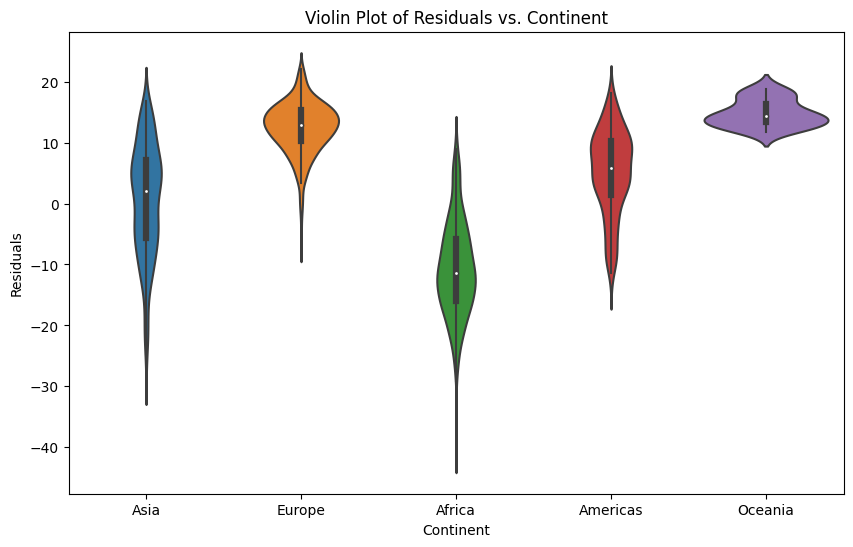

In [20]:
#Exercise 4

#creates a dataframe that includes residuals and continent
resid_cont_df = pd.DataFrame({'Continent': country_data['continent'], 'Residuals': residuals})

#plots the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Continent', y='Residuals', data=resid_cont_df)

plt.title('Violin Plot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')

#shows the plot
plt.show()

Prose:

A violin plot is created to show the relationship between continent and residuals.

Question 9:

The violins are assymetrical. Also Europe and Oceania have wide violins and also the general distribution of data points for each contintent does not appear to be similar which also suggests a strong dependency.

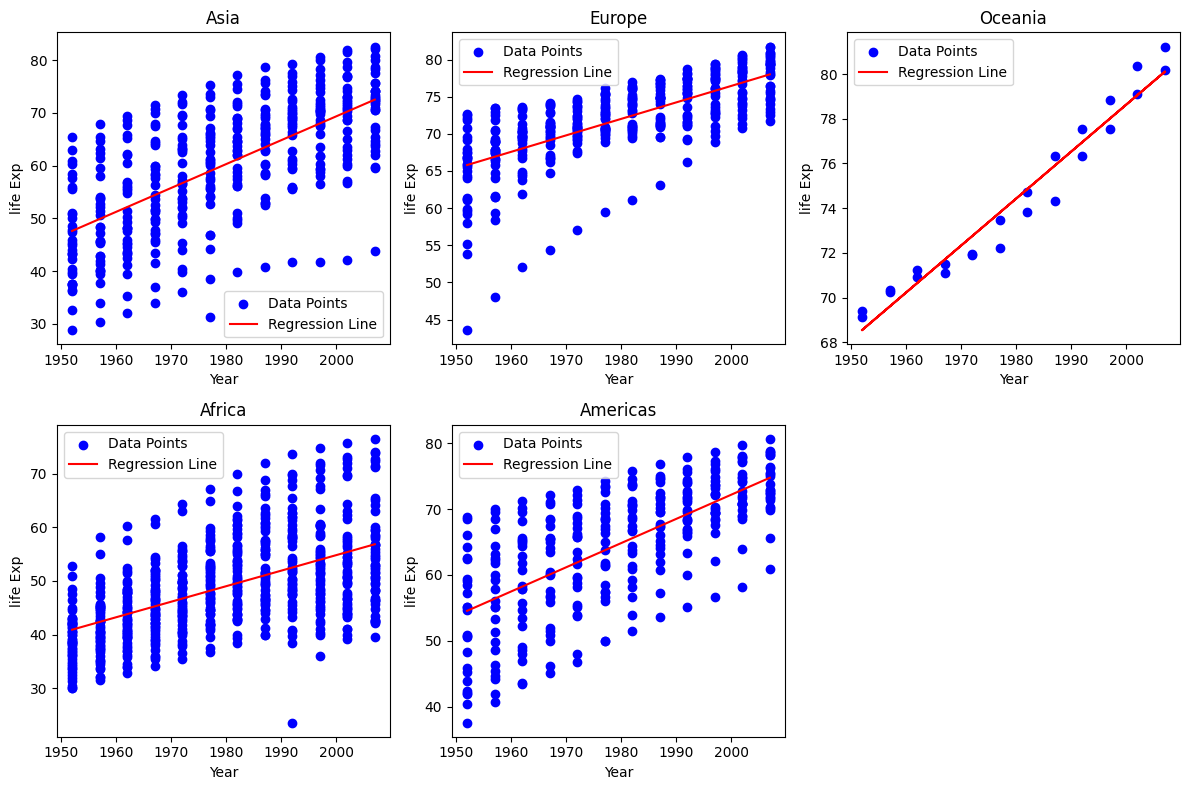

In [21]:
#Exercise 5
import numpy as np
continents = ['Asia', 'Europe', 'Oceania', 'Africa', 'Americas']
i = 0
plt.figure(figsize=(12, 8))

#traverses through all continents and creates a datframe for each continent and plots
#life expectancy vs. year for each continent and graphs a regression line as well
#to better see the relationship
for cont in continents:
  continent_data = country_data[country_data['continent'] == cont]


  #plots scatter plot
  plt.subplot(2, 3, i + 1)
  plt.scatter(continent_data['year'], continent_data['lifeExp'], color = 'b',label = 'Data Points')

  #creates the regression line
  regression_coeffs = np.polyfit(continent_data['year'], continent_data['lifeExp'], 1)
  plt.plot(continent_data['year'], np.polyval(regression_coeffs, continent_data['year']), 'r-', label='Regression Line')

  #Labels and displays the graph
  for j, row in continent_data.iterrows():


      plt.xlabel('Year')
      plt.ylabel('life Exp')
      plt.title(f'{cont}')
      plt.legend()
  i+=1

plt.tight_layout()



#shows the plot
plt.show()

Prose:

5 scatter plots are created (1 for each continent) to show the relationship between life expectancy and year for each continent.

Question 10:

There is an interaction effect present because the regression line varies between continents which shows that continent as well as year effects life expectancy. If we added an interaction term, it would improve the accuracy of our model. Because of this, we should add an interaction term between continent and year to improve our model.

In [22]:
#Exercise 6

#creates a model that includes the interaction term between year and continent
model = smf.ols(formula='lifeExp ~ year + continent + year:continent', data=country_data).fit()
africa_data = country_data[country_data['continent'] == 'Africa']
africa_model = smf.ols(formula ='lifeExp ~ year:continent', data=africa_data).fit()

#prints summary of the data and p-values to help show if the term significantly
#improved the model or not
print(model.summary())
print(africa_model.summary())
coefficients = model.params
p_values = model.pvalues

# Print the p-values
print(p_values)



                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:15:47   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Prose:

A linear regression model that includes the interaction term is created, and we print the summary of the mdoel to see if it significantly improved the model or not. Because Africa's slope was not significant, it was printed seperately to show that the slope is the same in both models for T.Africa.

Question 11:

Yes, all of the slopes and intercepts shown in the table are significantly greater than 0. However, the OLS model did not think Africa was statistically significant enough to include in the summary which means its slope is the same as the general one for year which is .2895.

Question 12:

Americas: .0781

Asia: .1636

Europe: -.0676

Africa: .2895

Oceania: -.0793

In [23]:
#Exercise 7

#first linear regression model made in exercise 2
model_exercise_2 = smf.ols(formula='lifeExp ~ year', data=country_data).fit()

#new linear regression model that includes the interaction term
model_exercise_6 = smf.ols(formula='lifeExp ~ year + continent + year:continent', data=country_data).fit()

#performs the F-test to compare the two models
f_statistic = model_exercise_2.fvalue
f_p_value = model_exercise_2.f_pvalue

new_stat = model_exercise_6.fvalue
new_stat_p = model_exercise_6.f_pvalue
#prints the F-statistic and p-value
print("F-statistic (Model 2):", f_statistic)
print("p-value (Model 2):", f_p_value)
print("F-statistic (Model 6):", new_stat)
print("p-value (Model 6):", new_stat_p)

F-statistic (Model 2): 398.6047457117622
p-value (Model 2): 7.546794625598736e-80
F-statistic (Model 6): 424.2729023400693
p-value (Model 6): 0.0


Prose:

performs an F-test to see if the new model is better than the old one and then prints out the results.

Question 13:

Both of the p-values are very close to 0 meaning both models are statistically significantly fit for the data. The model from exercise 6 has a higher F-statistic which means the model with the interaction term is a better fit than the one without.

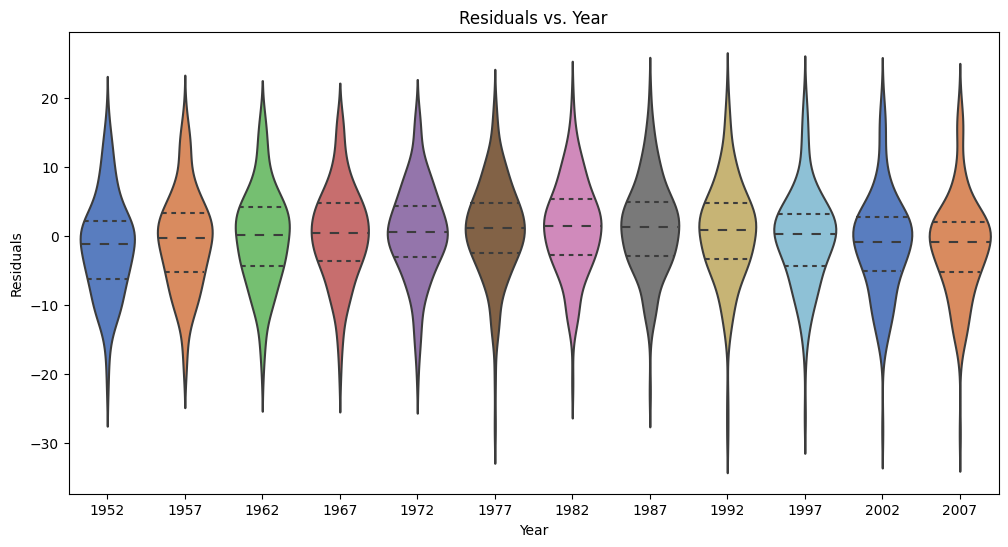

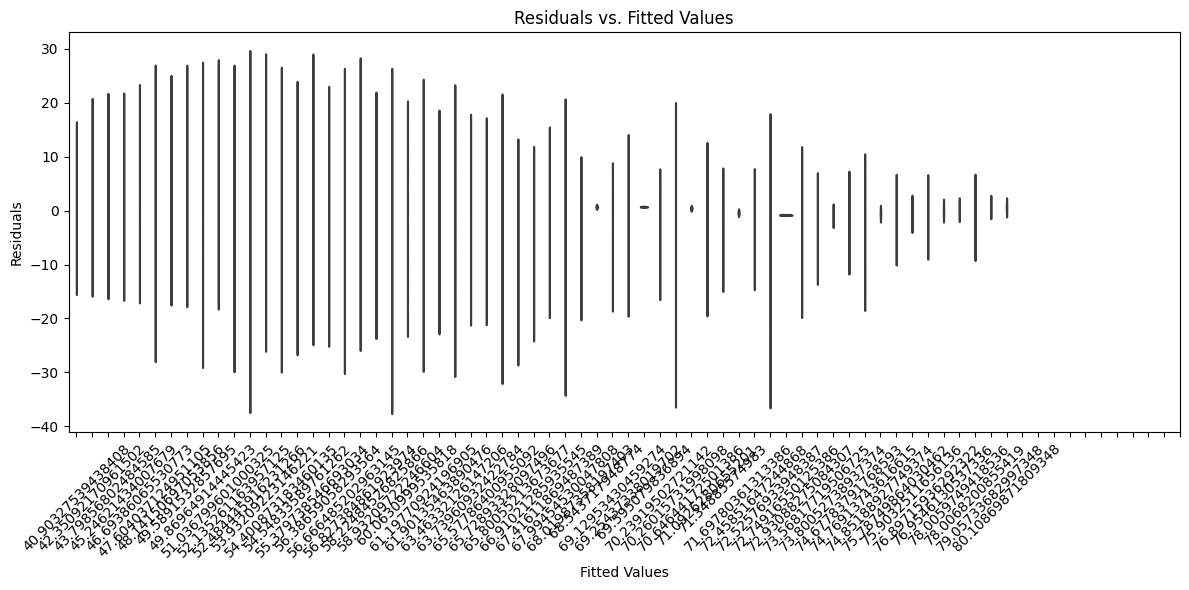

In [29]:
#Exercise 8

residuals = model_exercise_6.resid
fitted_values = model_exercise_6.fittedvalues


#create a DataFrame to store the residuals and fitted values
residuals_df = pd.DataFrame({'Residuals': residuals, 'Fitted Values': fitted_values})

#creates violin plots for residuals vs. year
plt.figure(figsize=(12, 6))
sns.violinplot(x=country_data['year'], y=residuals_df['Residuals'], inner='quart', palette='muted')
plt.title('Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')

#creates violin plot for residuals vs. fitted values
plt.figure(figsize=(12,6))
sns.violinplot(x=fitted_values, y=residuals_df['Residuals'], inner='quart', palette='muted')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

#makes ticks readable on the x-axis
x_ticks = list(range(0, 71))
plt.xticks(x_ticks, rotation=45)

plt.tight_layout()
plt.show()






Prose:

Creates 2 violin plots. The first one is residuals vs year and the second one is residuals vs. fitted values.

Exercise 8:

The violins are symmetric. The spread is similar for all years which means the variance is the same for all residuals which satisfies that condition of the linear regression model.

For the residual vs. fitted values graph, there is a curevd pattern which suggests the model may not be the represent the relationship between the independent and dependent variables well. It also does not appear that there is constant variance.

